In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from qutip import *
import time

# Create output directories
output_dir = "generated_images_qutip_color_bigger_linspace_2d3d_blues"
os.makedirs(output_dir, exist_ok=True)

# Parameters
N_values = [30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]
alpha_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
n_values = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
density_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Define linear spaces
lin_space5 = 5
lin_space6 = 6
lin_space7 = 7
lin_space8 = 8
lin_space9 = 9
lin_space10 = 10

lin_space_idx = [lin_space5, lin_space6, lin_space7, lin_space8, lin_space9, lin_space10]
lin_space = [
    np.linspace(-lin_space5, lin_space5, 200),
    np.linspace(-lin_space6, lin_space6, 200),
    np.linspace(-lin_space7, lin_space7, 200),
    np.linspace(-lin_space8, lin_space8, 200),
    np.linspace(-lin_space9, lin_space9, 200),
    np.linspace(-lin_space10, lin_space10, 200)
]

# Data storage
data = []

# A helper function to plot and save 2D & 3D Wigner side-by-side
def plot_and_save_qfunc(rho, xvec, image_path):
    fig = plt.figure(figsize=(10, 5))

    # 2D plot (QuTiP Q function)
    ax1 = fig.add_subplot(1, 2, 1)
    Q = qfunc(rho, xvec, xvec)
    ax1.contourf(xvec, xvec, Q, 100, cmap='Blues')
    ax1.set_title("Q Function 2D")
    ax1.set_xlabel("Re(α)")
    ax1.set_ylabel("Im(α)")

    # 3D plot
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    X, Y = np.meshgrid(xvec, xvec)
    surf = ax2.plot_surface(X, Y, Q, cmap='Blues', edgecolor='black', linewidth=0.25, antialiased=True)
    ax2.set_title("Q Function 3D")
    ax2.set_xlabel("Re(α)")
    ax2.set_ylabel("Im(α)")
    ax2.set_zlabel("Q")

    plt.tight_layout()
    plt.show()
    # plt.savefig(image_path, dpi=300)
    plt.close(fig)

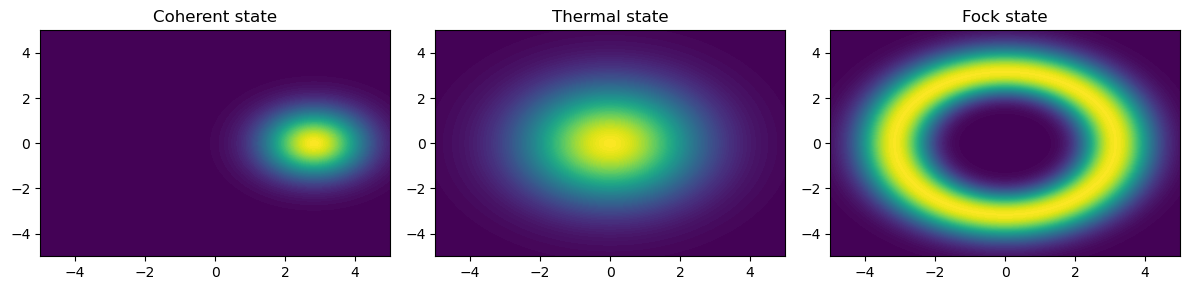

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from qutip import coherent, thermal_dm, fock, qfunc

# Parameters
N = 40
alpha = 2.0
n_th = 2.0
n_fock = 5
xvec = np.linspace(-5, 5, 400)  # Higher resolution grid

# States
rho_coherent = coherent(N, alpha) * coherent(N, alpha).dag()
rho_thermal = thermal_dm(N, n_th)
rho_fock = fock(N, n_fock) * fock(N, n_fock).dag()

# Husimi Q functions with Gaussian smoothing
Q_coherent = gaussian_filter(qfunc(rho_coherent, xvec, xvec), sigma=1)
Q_thermal = gaussian_filter(qfunc(rho_thermal, xvec, xvec), sigma=1)
Q_fock = gaussian_filter(qfunc(rho_fock, xvec, xvec), sigma=1)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for ax, Q, title in zip(axes, [Q_coherent, Q_thermal, Q_fock],
                        ["Coherent state", "Thermal state", "Fock state"]):
    im = ax.contourf(xvec, xvec, Q, 100, cmap='jet')  # or 'Blues'
    ax.set_title(title)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


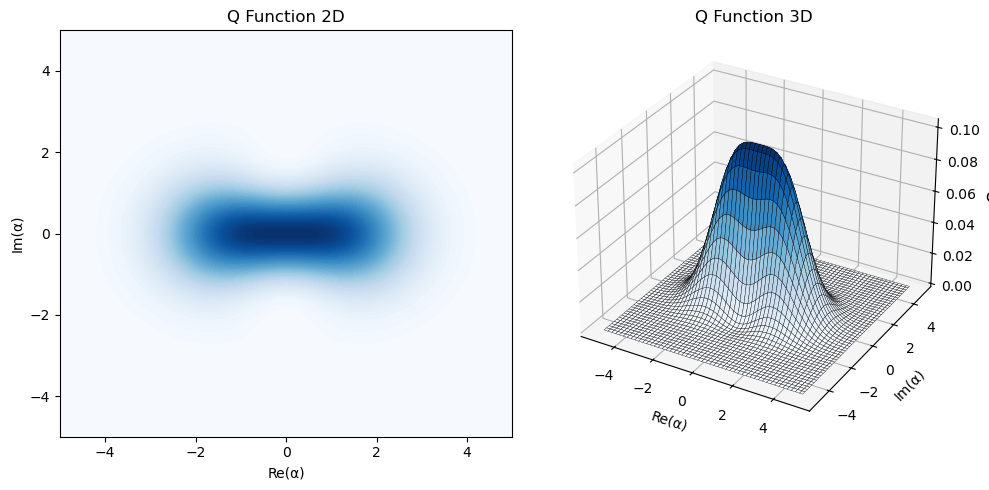

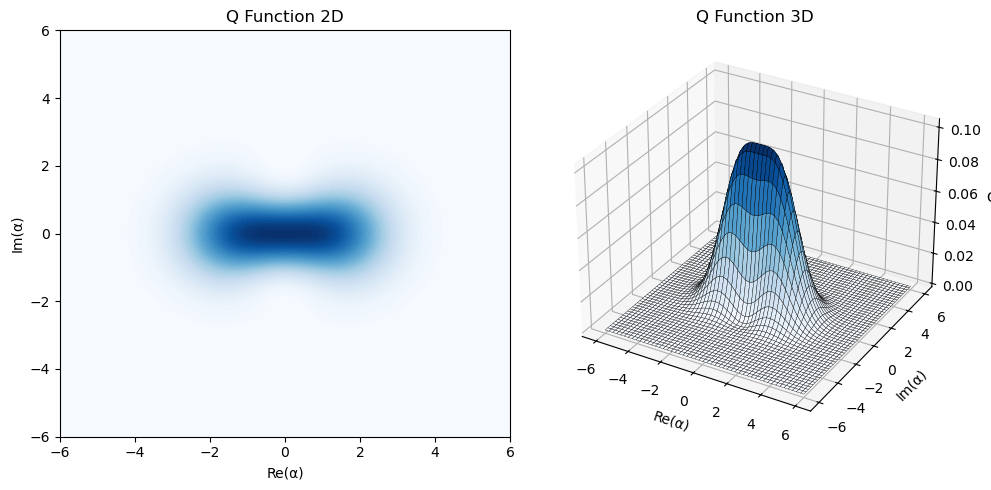

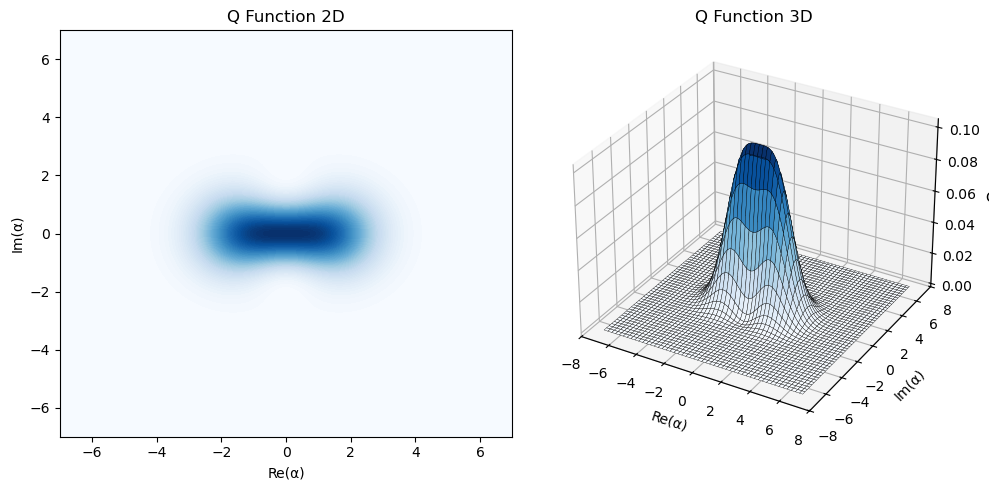

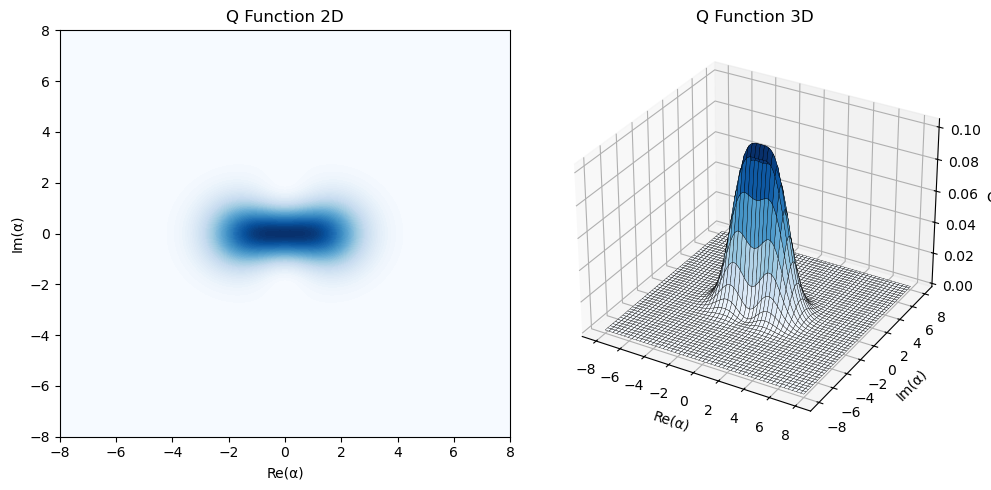

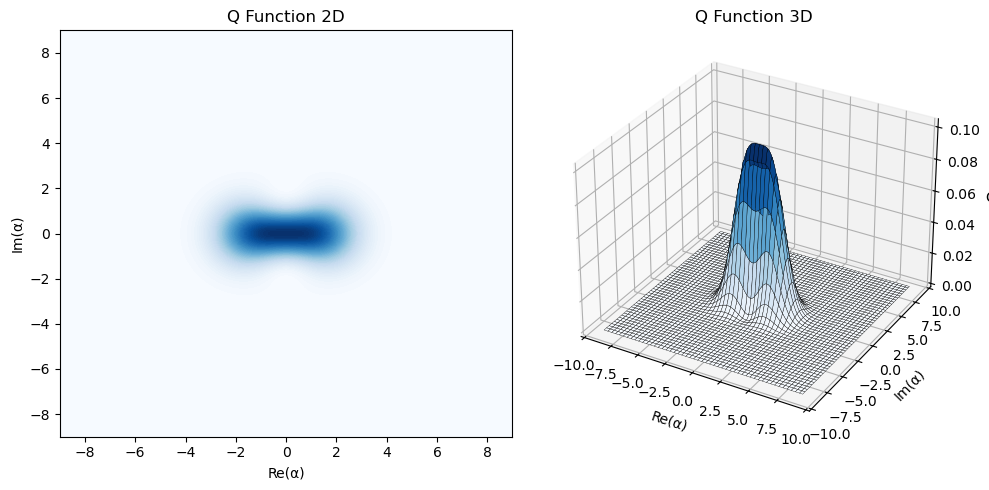

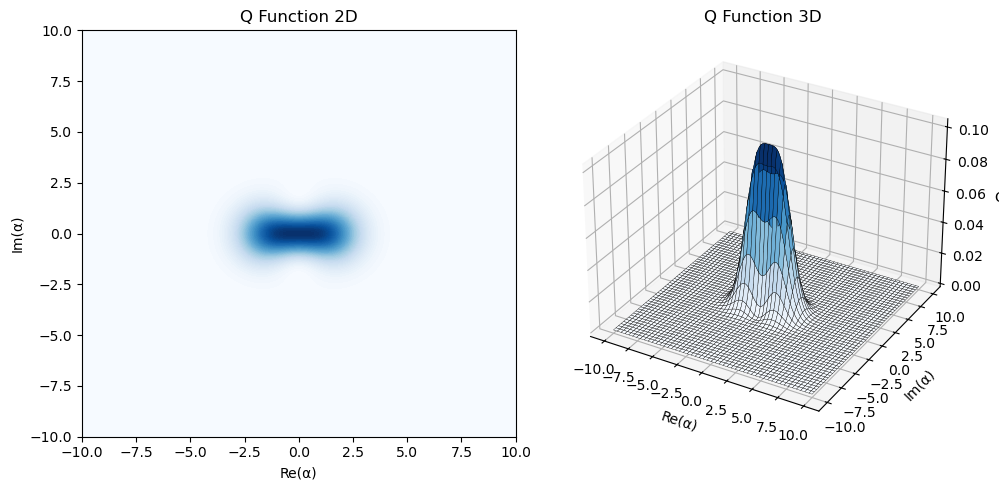

NameError: name 'counter' is not defined

In [3]:
for N in N_values:
    for alpha in alpha_values:
        state_name = "Cat state"
        try:
            rho_cat = (coherent(N, alpha) + coherent(N, -alpha)).unit()
            
            # loop through each lin_space
            for idx, xvec in enumerate(lin_space):
                W = qfunc(rho_cat, xvec, xvec)
                
                image_path = os.path.join(
                    output_dir,
                    f"{state_name.replace(' ', '_')}_N{N}_alpha{alpha}_linspace{lin_space_idx[idx]}.png"
                )
                
                # Plot 2D & 3D side by side
                plot_and_save_qfunc(rho_cat, xvec, image_path)
                
                ground_truth = (
                    f"This is a {state_name.lower()} with alpha={alpha}, "
                    f"number of qubits={N} in the linear space -{lin_space_idx[idx]} to {lin_space_idx[idx]}."
                )
                data.append([image_path, state_name, "", ground_truth])
                
        except Exception as e:
            print(f"Error generating {state_name} state (N={N}, alpha={alpha}): {e}")
            
        counter += 1
        if counter % 10 == 0:
            time.sleep(1)